In [37]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
from tensorflow.python.data.ops import map_op


In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3 #rgb channel
EPOCHS = 20

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"AcneDataset",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)
#Loads all images and divides them into 32 batches internally

Found 999 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Level_0', 'Level_1', 'Level_2']

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 2 1 0 0 1 1 2 1 1 1 2 1 0 0 2 2 0 1 0 0 1 1 1 0 0 2 1 0 0 1 0]


(32, 256, 256, 3)
[0 1 1 1 2 0 0 0 2 0 0 1 2 0 0 0 0 2 1 1 1 1 0 0 1 1 0 1 1 1 0 1]


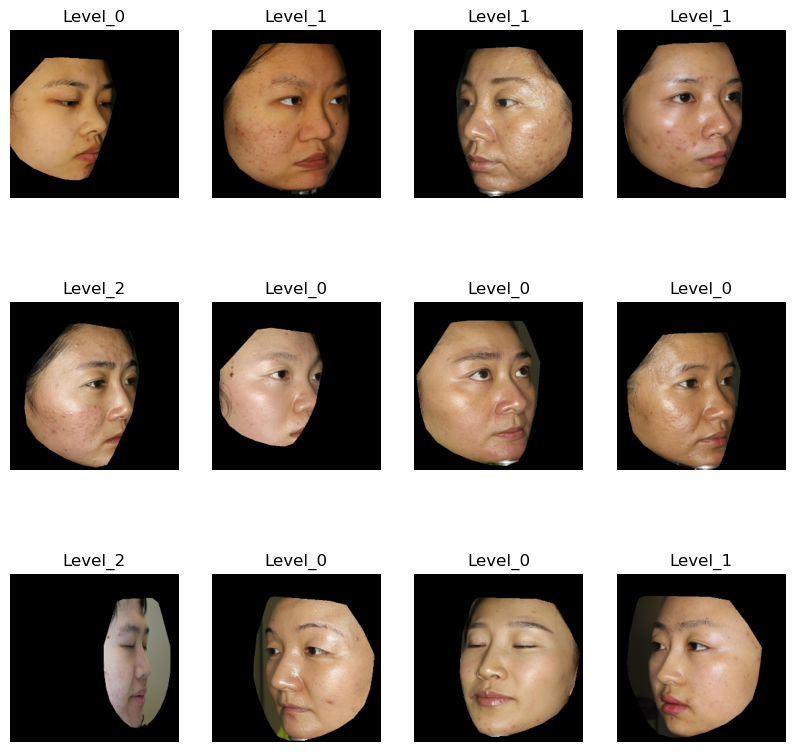

In [7]:
plt.figure(figsize=(10,10)) #size of image
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12): #will print 12 images
        ax = plt.subplot(3,4,i+1) #will print in 3*4 matrix format
        plt.imshow(image_batch[i].numpy().astype("uint8")) #converting the tensor object into numpy and then unto int8
        plt.title(class_names[labels_batch[i]])
        plt.axis("off") #eliminates the axis around, so only image is displayed

In [8]:
#Function to split the dataset into training, testing and validation data
def get_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split+val_split+test_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds=get_partitions(dataset)

In [10]:
len(train_ds)

25

In [11]:
len(test_ds)

4

In [12]:
len(val_ds)

3

In [13]:
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [15]:
resize_and_rescale = tf.keras.Sequential([
      layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),                
     layers.experimental.preprocessing.Rescaling(1./255)               
])
     


In [44]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
   
])

In [48]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = keras.models.Sequential([
        resize_and_rescale, 
       data_augumentation,
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

model.build(input_shape=input_shape)

In [49]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 256, 3)             0         
                                                                 
 sequential_8 (Sequential)   (256, 256, 3)             0         
                                                                 
 conv2d_36 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (32, 127, 127, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (32, 127, 127, 64)        18496     
                                                     

In [50]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
history = model.fit(
   train_ds,
   epochs = EPOCHS ,
   batch_size = BATCH_SIZE ,
   verbose = 1,
   validation_data = val_ds
)

Epoch 1/20
25/25 [==============================] - 62s 2s/step - loss: 1.0274 - accuracy: 0.4663 - val_loss: 1.0632 - val_accuracy: 0.3333
Epoch 2/20
25/25 [==============================] - 58s 2s/step - loss: 1.0022 - accuracy: 0.4663 - val_loss: 1.0148 - val_accuracy: 0.5104
Epoch 3/20
25/25 [==============================] - 59s 2s/step - loss: 1.0023 - accuracy: 0.4737 - val_loss: 1.0490 - val_accuracy: 0.5000
Epoch 4/20
25/25 [==============================] - 60s 2s/step - loss: 1.0024 - accuracy: 0.4600 - val_loss: 1.0196 - val_accuracy: 0.5104
Epoch 5/20
20/25 [=======================>......] - ETA: 12s - loss: 0.9862 - accuracy: 0.4781

In [23]:
scores= model.evaluate(test_ds)

4/4 [==============================] - 3s 494ms/step - loss: 0.9852 - accuracy: 0.5391


In [24]:
scores

[0.985159158706665, 0.5390625]

In [25]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 25}

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']

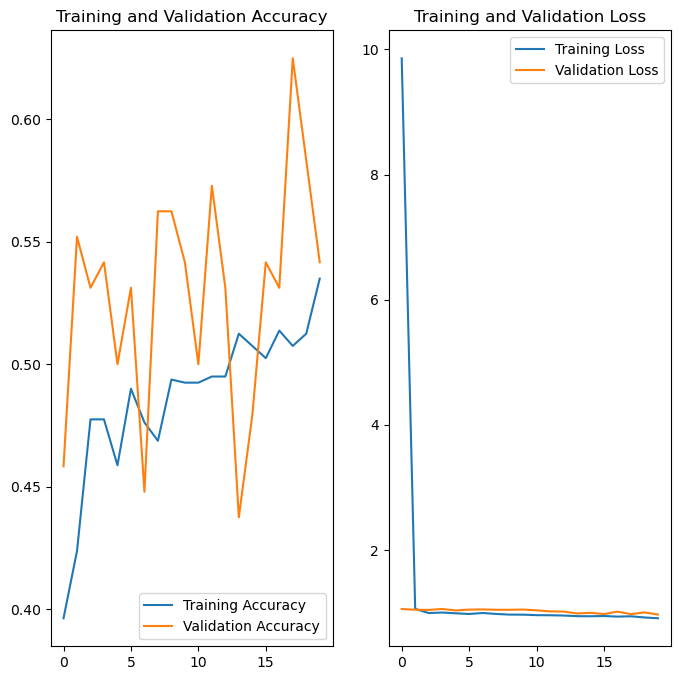

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label: Level_1
1/1 [==============================] - 1s 771ms/step
Predicted Label: Level_1


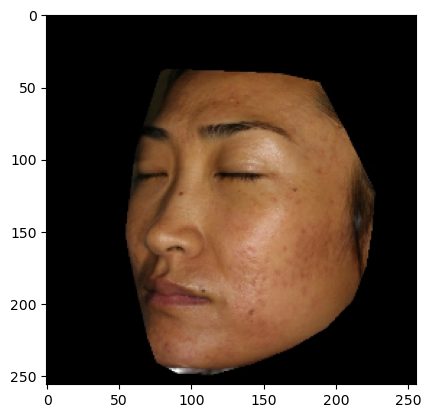

In [29]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[labels_batch[0].numpy()])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [30]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence= round(100 *(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 67ms/step


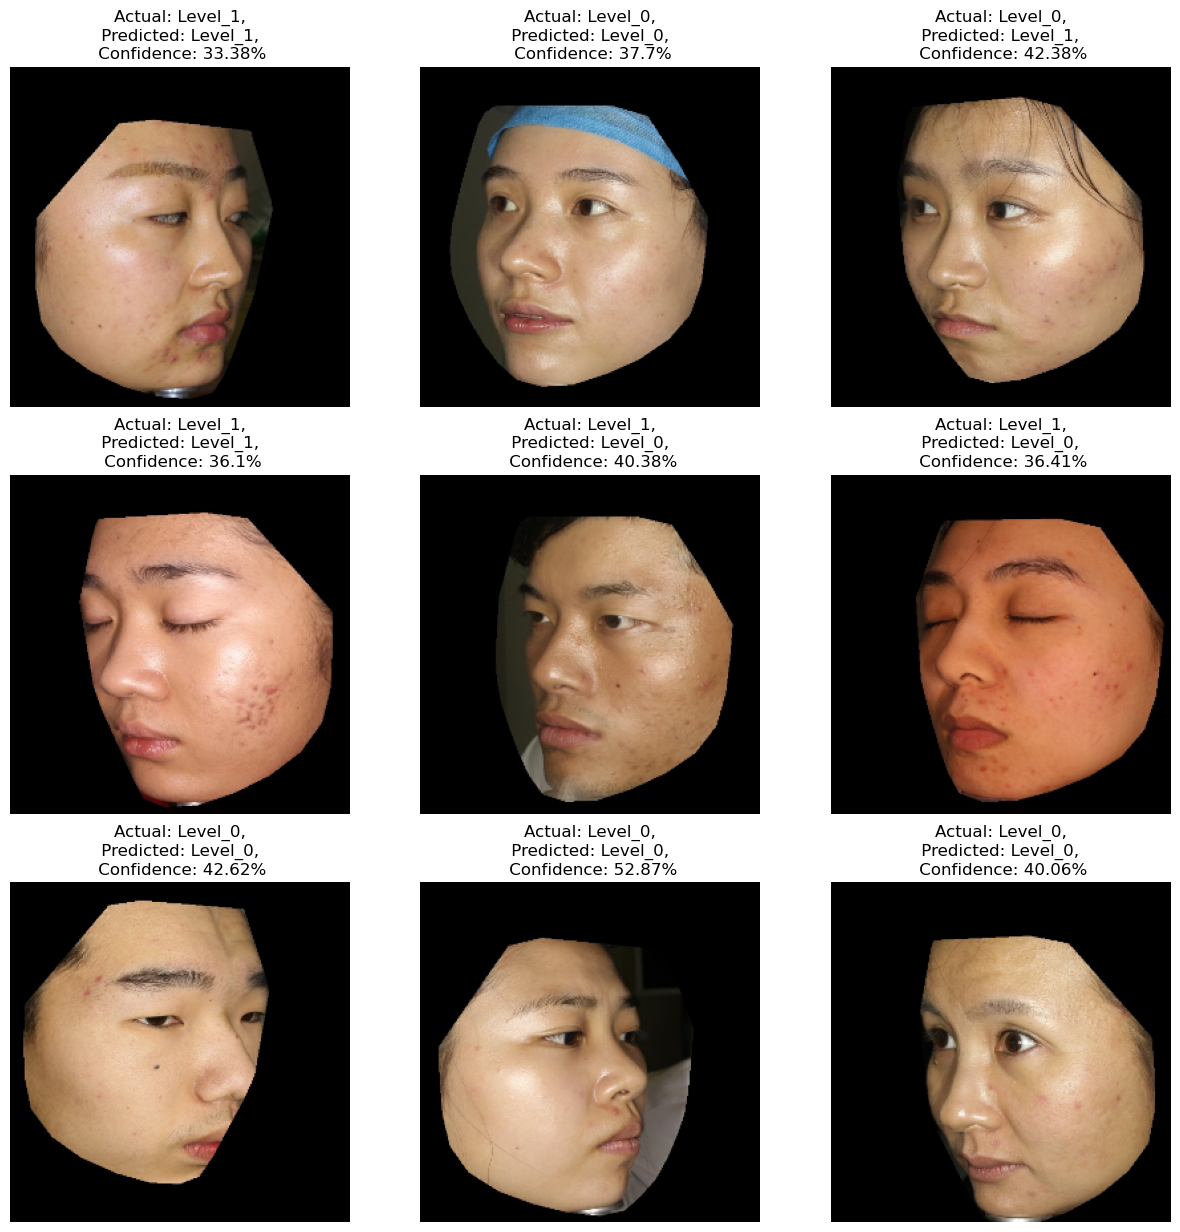

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        plt.axis("off")

In [32]:
model_version =1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets
